# This notebook will serve for the analysis of the Pictures and Statistics for the TFW project

In [207]:
# Import necassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Load the datasets
df_statistics = pd.read_csv('../data/statistics_20210707.csv')
df_pictures = pd.read_csv('../data/pictures_dataset.csv')

In [209]:
df_statistics.head(2)

yearmonth                            listing_id  inquiry_count  \
0   2019/07  f1133916-825e-5e2a-93be-eaba28a966e8              2   
1   2019/07  836959d3-611c-5edb-887c-273aba5bd102              0   

   inquiry_volume  binding_inquiry_count  binding_inquiry_volume  \
0            1352                      0                       0   
1               0                      0                       0   

   direct_booking_count  direct_booking_volume  result_views  expose_views  \
0                     0                      0          1109            85   
1                     0                      0           871            23   

   phone_clicks  
0             1  
1             2

In [210]:
df_pictures.head(2)

Unnamed: 0                            listing_id                added  \
0           0  fbd74bce-23dd-53e7-b988-8beb85160d6f  2009-12-03 00:00:00   
1           1  4e012316-0f53-5fc6-a17f-580ff832554e  2010-01-05 00:00:00   

             activated description  start_pic_summer  start_pic_winter  \
0  2010-12-16 00:00:00  Furnishing                 0                 0   
1  2010-12-16 00:00:00  Floor plan                 0                 0   

  picture_resolution  
0    High-definition  
1    Poor Resolution

In [211]:
print(df_pictures.shape)
print(df_statistics.shape)

(644821, 8)
(674604, 11)


In [212]:
df_pictures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644821 entries, 0 to 644820
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          644821 non-null  int64 
 1   listing_id          644821 non-null  object
 2   added               644821 non-null  object
 3   activated           644821 non-null  object
 4   description         644821 non-null  object
 5   start_pic_summer    644821 non-null  int64 
 6   start_pic_winter    644821 non-null  int64 
 7   picture_resolution  644821 non-null  object
dtypes: int64(3), object(5)
memory usage: 39.4+ MB


In [213]:
df_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674604 entries, 0 to 674603
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   yearmonth               674604 non-null  object
 1   listing_id              674604 non-null  object
 2   inquiry_count           674604 non-null  int64 
 3   inquiry_volume          674604 non-null  int64 
 4   binding_inquiry_count   674604 non-null  int64 
 5   binding_inquiry_volume  674604 non-null  int64 
 6   direct_booking_count    674604 non-null  int64 
 7   direct_booking_volume   674604 non-null  int64 
 8   result_views            674604 non-null  int64 
 9   expose_views            674604 non-null  int64 
 10  phone_clicks            674604 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 56.6+ MB


## Remove unnamed column in df pictures

In [214]:
# Drop unnamed column
df_pictures = df_pictures.drop('Unnamed: 0', axis=1)

## Covert date features into datetime

In [215]:
# Convert to datetime
df_statistics['yearmonth'] = pd.to_datetime(df_statistics['yearmonth']).dt.strftime('%Y-%m')
df_pictures['added'] = pd.to_datetime(df_pictures['added']).dt.date
df_pictures['activated'] = pd.to_datetime(df_pictures['activated']).dt.date
df_pictures['yearmonth'] = pd.to_datetime(df_pictures['activated']).dt.strftime('%Y-%m')

In [216]:
# Number of unique listings ID
print(df_statistics.listing_id.nunique())
print(df_pictures.listing_id.nunique())

# Houses without pictures
print(df_statistics.listing_id.nunique() - df_pictures.listing_id.nunique(), 'properties have no pictures.')

30269
30222
47 properties have no pictures.


47 properties have no pictures.

In [217]:
# Using groupby to summarize the statistics per yearmonth
statistic_per_month = df_statistics.groupby('yearmonth').sum().reset_index()

## Distributions of the features in Pictures

First, lets have a look on the picture resolution.

<AxesSubplot:>

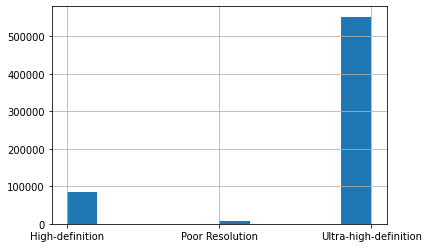

In [218]:
df_pictures.picture_resolution.hist()

Most of the pictures have a ultra-high-definition.

Lets have a look a the motives and motives by resolution.

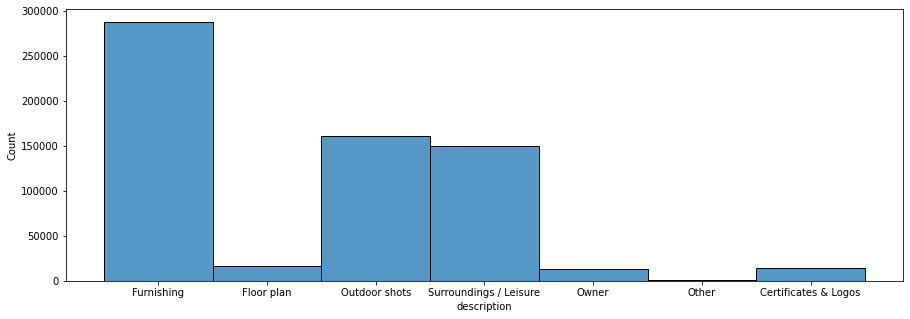

In [219]:
# Histogram description
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_pictures, x="description");


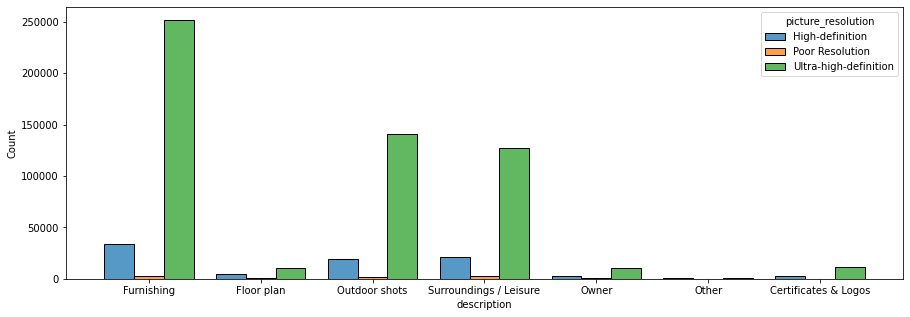

In [220]:
# Histogram description by picture resolution
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_pictures, x="description", hue='picture_resolution', multiple="dodge", shrink=.8);

Create a new column with the difference between the added and activated date for the picture to plot this.

In [221]:
# Create new column
df_pictures['diff_add_activate'] = df_pictures.activated - df_pictures.added

In [222]:
# Description of new column diff_add_activate
df_pictures.diff_add_activate.describe()

count                        644821
mean     10 days 03:55:42.983556677
std      90 days 02:44:48.990599274
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 0 days 00:00:00
75%                 1 days 00:00:00
max              3539 days 00:00:00
Name: diff_add_activate, dtype: object

The range of the new column diff_add_activate is wide. The minimum is a negative value. 

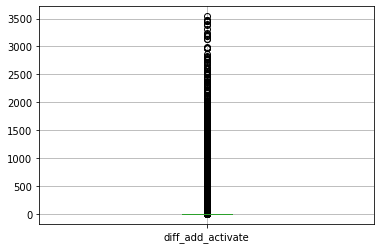

In [223]:
# Plotting the distribution after converting new column from timedelta to days
df_pictures['diff_add_activate'] = df_pictures['diff_add_activate'].dt.days
df_pictures.boxplot(column=['diff_add_activate']);

Most of the pictures have no difference between the dates added and activated.

Which motives have the high difference between added and activated date?

In [224]:
# 95 % percentile as threshold
df_pictures.diff_add_activate.quantile(0.95)

4.0

In [225]:
# Filter and groupby with 95 % percentile
df_pictures.query('diff_add_activate > 3').groupby('description')['diff_add_activate'].count()

description
Certificates & Logos        430
Floor plan                  987
Furnishing                13018
Other                       164
Outdoor shots              7530
Owner                       608
Surroundings / Leisure    10661
Name: diff_add_activate, dtype: int64

How many pictures have each unique property?

In [226]:
# Using groupby to summarize the statistics per yearmonth
picture_per_id = df_pictures.groupby('listing_id')['description'].count().reset_index()

In [227]:
# Description
picture_per_id.describe()

description
count  30222.000000
mean      21.336146
std        7.150067
min        1.000000
25%       18.000000
50%       21.000000
75%       23.000000
max       83.000000

<AxesSubplot:>

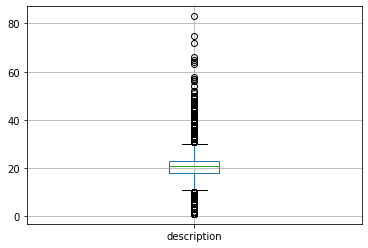

In [228]:
# Boxplot of distribution
picture_per_id.boxplot(column=['description'])

In [229]:
picture_per_id.columns

Index(['listing_id', 'description'], dtype='object')

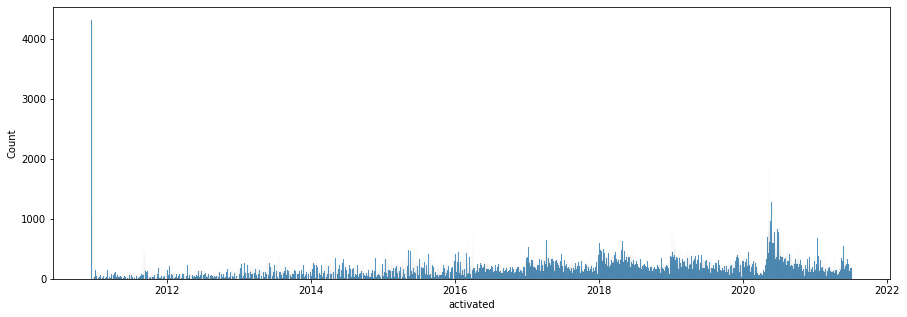

In [230]:
# Histogram description
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(data=df_pictures, x="activated");

## Merging both datasets

First, we encoding the feature picture resolution.

In [231]:
# Get one hot encoding of columns 'picture_resolution'
one_hot = pd.get_dummies(df_pictures['picture_resolution'])
# Drop column as it is now encoded
df_pictures = df_pictures.drop('picture_resolution',axis = 1)
# Join the encoded df
df_pictures = df_pictures.join(one_hot)

Second, we encoding the feature description.

In [232]:
# Get one hot encoding of columns 'description'
one_hot_2 = pd.get_dummies(df_pictures['description'])
# Drop column as it is now encoded
df_pictures = df_pictures.drop('description',axis = 1)
# Join the encoded df
df_pictures = df_pictures.join(one_hot_2)

In [233]:
# New shape of the dataset pictures
df_pictures.shape

(644821, 17)

Third, we group both datasets bei listing ID and yearmonth for the merging

In [234]:
# Groupby df_statistics and df_pictures
stats = df_statistics.groupby(['listing_id', 'yearmonth']).sum().reset_index()
pics = df_pictures.groupby(['listing_id', 'yearmonth']).sum().reset_index()

In [235]:
# Merging both new grouped datesets
pic_stat = pd.merge(stats, pics, on=['listing_id', 'yearmonth'], how='outer')

In [236]:
pic_stat.shape

(763388, 24)

### Calculate inquiry count, result views, ewpose views and phone clicks before and after activate pictures

First create a new column if a picture was activated or not

In [237]:
# Function to build categories
def categorizer(a, b, c):
    if np.isnan(a):
        if np.isnan(b):
            if np.isnan(c):
                return 0
    else:
        return 1

In [238]:
# Create new column
pic_stat['picture']= pic_stat.apply(lambda x: categorizer(
    x['High-definition'], x['Poor Resolution'], x['Ultra-high-definition']), axis=1)

In [239]:
pic_stat.shape

(763388, 25)

In [240]:
# Only years 2019 and 2020
start_date = "2019-01"
end_date = "2020-12"

after_start_date = pic_stat["yearmonth"] >= start_date
before_end_date = pic_stat["yearmonth"] <= end_date
between_two_dates = after_start_date & before_end_date
pic_stat_2019_2020 = pic_stat.loc[between_two_dates]

In [246]:
pic_stat_2019_2020.shape

(675193, 25)

In [247]:
test = pic_stat_2019_2020[pic_stat_2019_2020['listing_id'] == '0003f153-450a-5837-8a46-bd5db5b536b1']

In [248]:
test

listing_id yearmonth  inquiry_count  \
25  0003f153-450a-5837-8a46-bd5db5b536b1   2019-01            9.0   
26  0003f153-450a-5837-8a46-bd5db5b536b1   2019-02           20.0   
27  0003f153-450a-5837-8a46-bd5db5b536b1   2019-03           24.0   
28  0003f153-450a-5837-8a46-bd5db5b536b1   2019-04           15.0   
29  0003f153-450a-5837-8a46-bd5db5b536b1   2019-05           31.0   
30  0003f153-450a-5837-8a46-bd5db5b536b1   2019-06           13.0   
31  0003f153-450a-5837-8a46-bd5db5b536b1   2019-07           27.0   
32  0003f153-450a-5837-8a46-bd5db5b536b1   2019-08           15.0   
33  0003f153-450a-5837-8a46-bd5db5b536b1   2019-09           29.0   
34  0003f153-450a-5837-8a46-bd5db5b536b1   2019-10            2.0   
35  0003f153-450a-5837-8a46-bd5db5b536b1   2019-11            3.0   
36  0003f153-450a-5837-8a46-bd5db5b536b1   2019-12           12.0   
37  0003f153-450a-5837-8a46-bd5db5b536b1   2020-01           12.0   
38  0003f153-450a-5837-8a46-bd5db5b536b1   2020-02           15.0   
39  0003f153-450a-5837-8a46-bd5db5b536b1   2020-03            8.0   
40  0003f153-450a-5837-8a46-bd5db5b536b1   2020-04            1.0   
41  0003f153-450a-5837-8a46-bd5db5b536b1   2020-05           11.0   
42  0003f153-450a-5837-8a46-bd5db5b536b1   2020-06           18.0   
43  0003f153-450a-5837-8a46-bd5db5b536b1   2020-07            7.0   
44  0003f153-450a-5837-8a46-bd5db5b536b1   2020-08            7.0   
45  0003f153-450a-5837-8a46-bd5db5b536b1   2020-09           14.0   
46  0003f153-450a-5837-8a46-bd5db5b536b1   2020-10           14.0   
47  0003f153-450a-5837-8a46-bd5db5b536b1   2020-11            3.0   
48  0003f153-450a-5837-8a46-bd5db5b536b1   2020-12            1.0   

    inquiry_volume  binding_inquiry_count  binding_inquiry_volume  \
25          3090.0                    0.0                     0.0   
26          4884.0                    0.0                     0.0   
27          4915.0                    0.0                     0.0   
28          3487.0                    0.0                     0.0   
29          6539.0                    0.0                     0.0   
30          2945.0                    0.0                     0.0   
31          7219.0                    0.0                     0.0   
32          3472.0                    0.0                     0.0   
33          6837.0                    0.0                     0.0   
34           365.0                    0.0                     0.0   
35          1065.0                    0.0                     0.0   
36          2950.0                    0.0                     0.0   
37          3669.0                    0.0                     0.0   
38          2790.0                    0.0                     0.0   
39          1793.0                    0.0                     0.0   
40           277.0                    0.0                     0.0   
41          4168.0                    0.0                     0.0   
42          6018.0                    0.0                     0.0   
43           702.0                    0.0                     0.0   
44          1710.0                    0.0                     0.0   
45          2876.0                    0.0                     0.0   
46          3381.0                    0.0                     0.0   
47          1809.0                    0.0                     0.0   
48           524.0                    0.0                     0.0   

    direct_booking_count  direct_booking_volume  result_views  expose_views  \
25                   0.0                    0.0        2224.0         576.0   
26                   0.0                    0.0        1705.0         608.0   
27                   0.0                    0.0        1404.0         612.0   
28                   0.0                    0.0        1229.0         547.0   
29                   0.0                    0.0        1169.0         527.0   
30                   0.0                    0.0        2230.0         598.0   
31                   0.0 

In [249]:
idx = np.where(test["picture"] == 1)

In [256]:
for indices in idx:
    before = []
    after = []
    dates = test.iloc[indices]
    print(dates['yearmonth'])
    for date in dates['yearmonth']:
        before.append(test[test['yearmonth'] <= date]['result_views'].sum())
        after.append(test[test['yearmonth'] > date]['result_views'].sum())
print(before, after)

26    2019-02
36    2019-12
41    2020-05
Name: yearmonth, dtype: object
[3929.0, 22938.0, 32765.0] [37261.0, 18252.0, 8425.0]


In [262]:
df_statistics['pictures'] = np.where(df_statistics['listing_id'].isin(df_pictures['listing_id']), 1, 0)

In [263]:
df_statistics.head(2)

yearmonth                            listing_id  inquiry_count  \
0   2019-07  f1133916-825e-5e2a-93be-eaba28a966e8              2   
1   2019-07  836959d3-611c-5edb-887c-273aba5bd102              0   

   inquiry_volume  binding_inquiry_count  binding_inquiry_volume  \
0            1352                      0                       0   
1               0                      0                       0   

   direct_booking_count  direct_booking_volume  result_views  expose_views  \
0                     0                      0          1109            85   
1                     0                      0           871            23   

   phone_clicks  pictures  
0             1         1  
1             2         1

In [264]:
df_statistics.pictures.value_counts()

1    673528
0      1076
Name: pictures, dtype: int64

In [265]:
df_statistics.query('pictures == 1')['inquiry_count'].describe()

count    673528.000000
mean          2.258292
std           6.886666
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max         694.000000
Name: inquiry_count, dtype: float64

In [266]:
df_statistics.query('pictures == 0')['inquiry_count'].describe()

count    1076.000000
mean        1.228625
std         2.904969
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        38.000000
Name: inquiry_count, dtype: float64

In [271]:
df_statistics.listing_id.where(df_statistics['pictures'] == 0).unique()

array([nan, '07e0c40b-91a6-5ffb-bb9b-d70beddeaed5',
       'ec5b4569-b0f6-57b1-9657-80f2b832201b',
       '9a72405a-395d-5978-a7aa-609899012412',
       'd4151361-4518-5bd1-a23c-0c4e7713994c',
       'a53f77dc-12c5-57b6-844b-b9e2c127c601',
       'a3d7c836-337c-54c2-bbcf-5e96aa5f5950',
       'b7e41002-5caa-5f0f-ac21-9b67aeed289a',
       '802d01d6-dc04-5302-a15c-f72c7c23f7da',
       'af0eadeb-bd34-54aa-b3d2-c4b598c8327a',
       '9706797f-2f51-56b0-b248-9834eec2e095',
       'cf63288e-bee8-5b3b-b686-444f9629c1f8',
       'cf31e8e0-b102-532e-889e-e0b3b54620d1',
       '91ce464f-24ab-565f-b38d-2723a8833af8',
       '8a14014b-c71b-5083-879e-6e8eec725125',
       'b25773bf-192e-5058-a6fc-91844396e7e1',
       '5e75c272-09c2-5f2a-bfb8-6683664a5f78',
       'bc8a8ba7-3d7a-555f-a503-677825e7883e',
       'fa23f575-94be-5d04-9fec-58ee18f0fa4e',
       '65342f0e-ca7e-55a8-854a-f5bd22bc094e',
       'ef63f7a6-d606-5538-abd4-d2cad9088dbf',
       '84382ce3-960e-597a-89c7-6c8a0d6169f9',
       '